In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [59]:
df = pd.read_excel("World_development_mesurement.xlsx")
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [60]:
df.shape

(2704, 25)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [62]:
df.isnull().sum().sort_values(ascending=False)

Ease of Business          2519
Hours to do Tax           1288
Business Tax Rate         1281
Days to Start Business     986
Energy Usage               919
Lending Interest           824
CO2 Emissions              579
Tourism Outbound           471
Tourism Inbound            368
Health Exp/Capita          309
Health Exp % GDP           309
Infant Mortality Rate      260
Population 15-64           220
Population 65+             220
Population 0-14            220
GDP                        210
Internet Usage             173
Mobile Phone Usage         167
Life Expectancy Female     136
Life Expectancy Male       136
Birth Rate                 119
Population Urban            26
Country                      0
Number of Records            0
Population Total             0
dtype: int64

In [63]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [64]:
#num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

#num_cols, 
cat_cols

Index(['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [65]:
df.select_dtypes(include='object').columns

Index(['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [66]:
numeric_like_cols = [col for col in cat_cols if col != 'Country']

In [67]:
numeric_like_cols

['Business Tax Rate',
 'GDP',
 'Health Exp/Capita',
 'Tourism Inbound',
 'Tourism Outbound']

In [68]:
df_clean = df.copy()

numeric_like_cols = []
for col in cat_cols:
    if col != 'Country':
        df_clean[col] = (
            df_clean[col]
            .astype(str)
            .str.replace('$', '', regex=False)
            .str.replace(',', '', regex=False)
            .str.replace('%', '', regex=False)
            .str.strip()
        )
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        numeric_like_cols.append(col)

In [69]:
df_clean

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2.610959e+09,0.051,12.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4,NaN,United States,5.0,4.0,2132446.0,1.624460e+13,0.179,8895.0,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,41.9,NaN,Uruguay,7.0,85.0,NaN,5.000435e+10,0.089,1308.0,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,61.9,NaN,"Venezuela, RB",144.0,180.0,NaN,3.812862e+11,0.046,593.0,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [70]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

In [71]:
print("Numeric columns:")
print(num_cols)

print("Object columns:")
print(df_clean.select_dtypes(include='object').columns)

Numeric columns:
Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')
Object columns:
Index(['Country'], dtype='object')


In [72]:
num_imputer = SimpleImputer(strategy='median')
df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])

In [73]:
df_clean.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [74]:
df_model = df_clean.drop(columns=['Country'])

In [75]:
log_cols = [
    'GDP',
    'CO2 Emissions',
    'Energy Usage',
    'Health Exp/Capita',
    'Tourism Inbound',
    'Tourism Outbound'
]

for col in log_cols:
    if col in df_model.columns:
        df_model[col] = np.log1p(df_model[col])

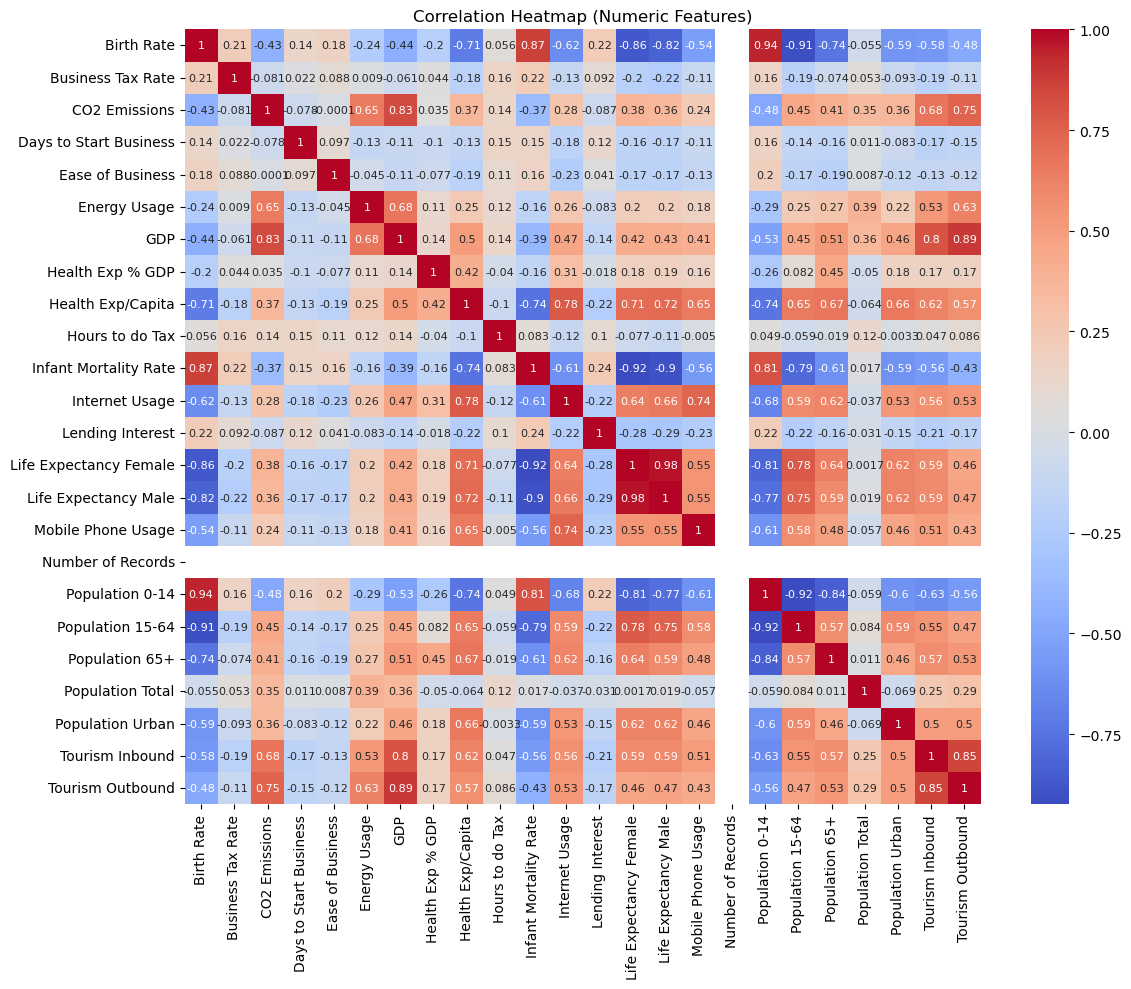

In [76]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_model.corr(), cmap='coolwarm', annot=True,annot_kws={"size": 8})
plt.title("Correlation Heatmap (Numeric Features)")
#plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

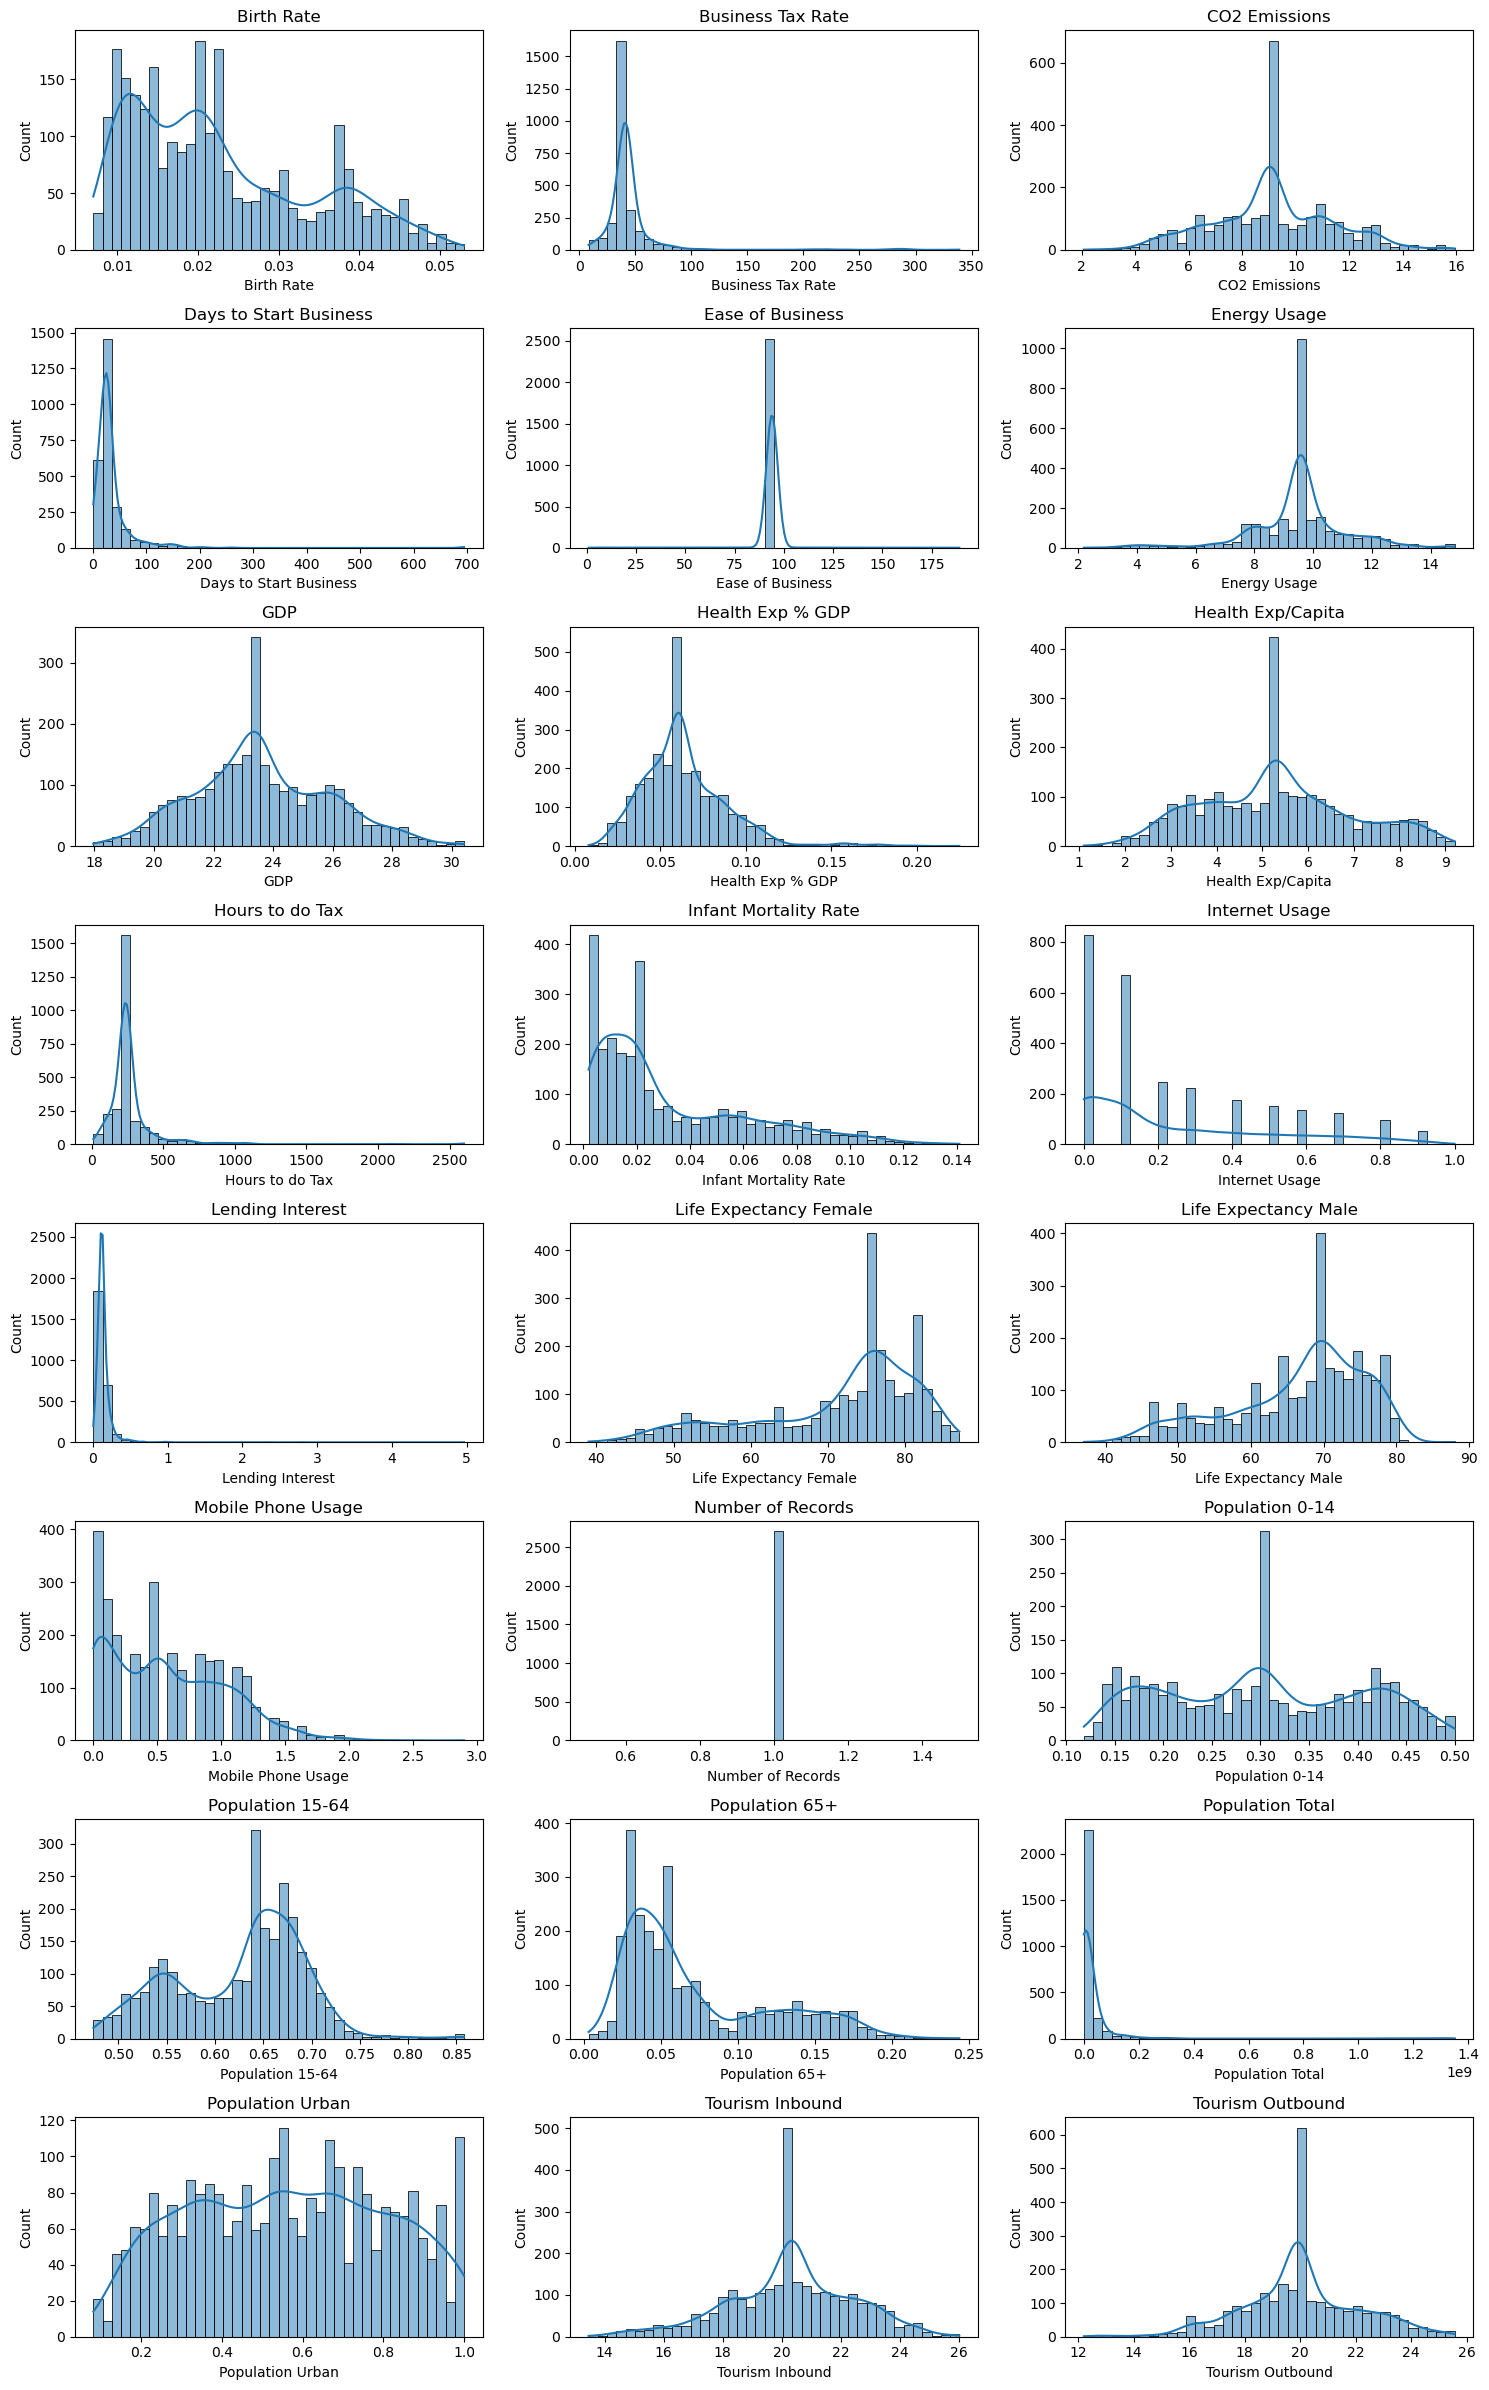

In [77]:
num_cols = df_model.select_dtypes(include = ['int64', 'float64']).columns
plot_df = df_model[num_cols]
sample_n = min(10000, plot_df.shape[0])
plot_sample = plot_df.sample(sample_n, random_state=42)

cols = 3
n = len(plot_sample.columns)
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
axes = axes.flatten()
for i, col in enumerate(plot_sample.columns):
    sns.histplot(plot_sample[col], ax=axes[i], kde=True, bins=40, color='C0')
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
#plt.savefig("subplot.png", dpi=300, bbox_inches='tight')
plt.show()

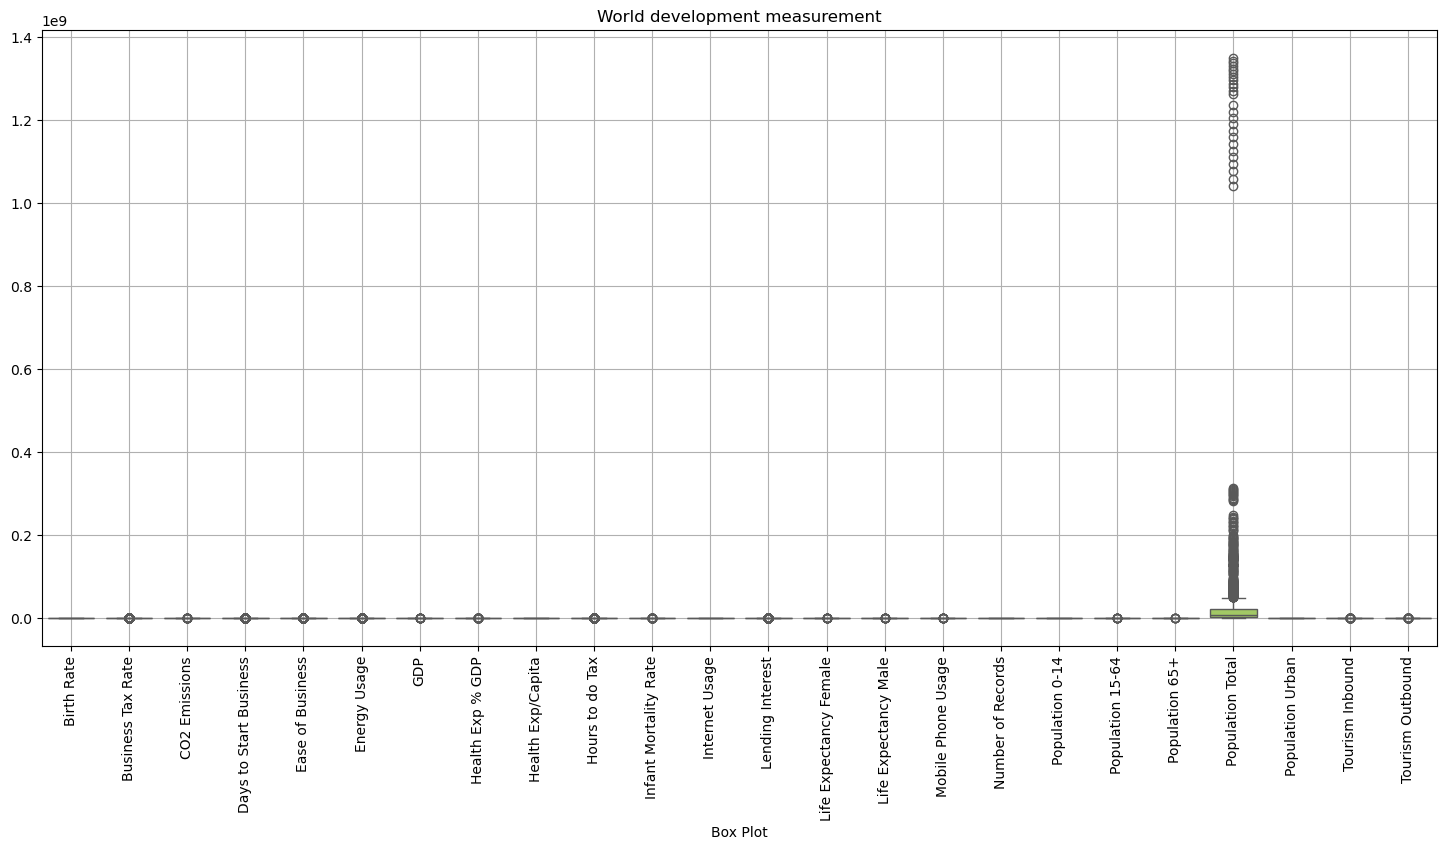

In [78]:
num_cols = df_model.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.boxplot(data=num_cols,palette='Set2')
plt.title("World development measurement")
plt.xlabel("Box Plot")
plt.grid(True)
plt.savefig("boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

X_scaled = pd.DataFrame(X_scaled, columns=df_model.columns)

In [80]:
np.isnan(X_scaled).sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [81]:
## K-Means Clustering

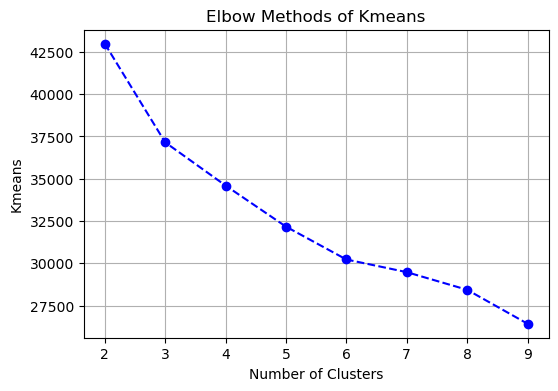

In [82]:
Kmean_data =[]

for k in range(2,10):
    km = KMeans(n_clusters= k, random_state=42)
    km.fit(X_scaled)
    Kmean_data.append(km.inertia_)

plt.figure(figsize =(6,4))
plt.plot(range(2,10),Kmean_data, marker = 'o',linestyle='--', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Kmeans")
plt.grid(True)
plt.title("Elbow Methods of Kmeans")
#plt.savefig("Elbow_method.png", dpi=300, bbox_inches='tight')
plt.show()

In [83]:
kmeans = KMeans(n_clusters = 3, random_state=42)
df_model["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

In [84]:
df_model.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,KMeans_Cluster
0,0.020,41.0,11.384319,26.0,94.0,10.203555,24.726775,0.035,4.110874,239.0,...,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,18.440483,19.078201,2
1,0.050,41.0,9.163563,26.0,94.0,8.922658,22.934787,0.034,3.135494,239.0,...,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,17.341871,18.799117,1
2,0.043,41.0,7.388946,26.0,94.0,7.592870,21.581555,0.043,2.772589,239.0,...,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,18.159316,17.727534,1
3,0.027,41.0,8.361007,26.0,94.0,7.515889,22.479106,0.047,5.030438,239.0,...,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,19.240461,19.157845,1
4,0.046,41.0,6.948897,26.0,94.0,9.570738,21.682983,0.051,2.564949,239.0,...,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,16.951005,17.216708,1


In [85]:
from sklearn.decomposition import PCA

In [86]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=pca_data,columns=['PC1','PC2'])
pca_df['KMeans_Cluster'] = df_model['KMeans_Cluster']

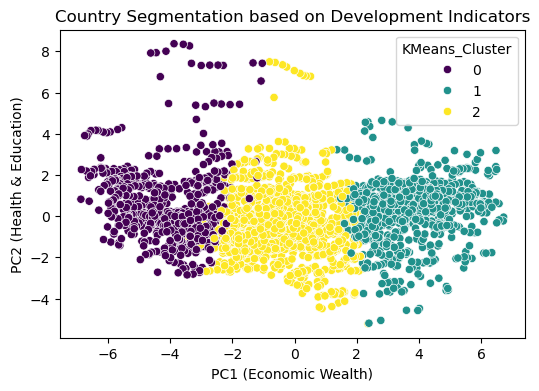

In [87]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis')
plt.title('Country Segmentation based on Development Indicators')
plt.xlabel('PC1 (Economic Wealth)')
plt.ylabel('PC2 (Health & Education)')
#plt.savefig("PCA.png", dpi=300, bbox_inches='tight')
plt.show()

In [88]:
sil_Kmeans = silhouette_score(X_scaled,df_model['KMeans_Cluster'])
sil_Kmeans

np.float64(0.22475254852628268)

In [89]:
## Hierarchical Clustering

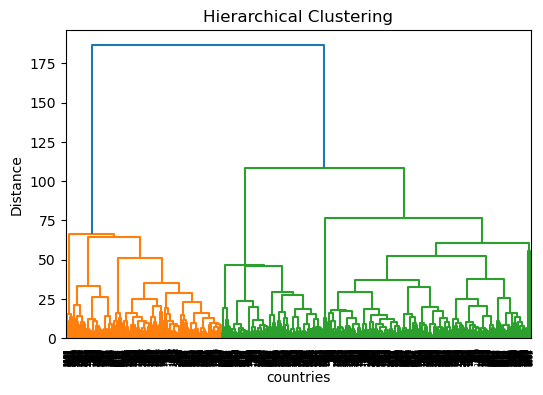

In [90]:
linked = linkage(X_scaled,method="ward")

plt.figure(figsize = (6,4))
dendrogram(linked)
plt.title("Hierarchical Clustering")
plt.xlabel('countries')
plt.ylabel('Distance')
#plt.savefig("Hierarchical_clustering.png", dpi=300, bbox_inches='tight')
plt.show()

In [91]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_model['Hierarchical_Cluster'] = hc.fit_predict(X_scaled)

df_model.groupby('Hierarchical_Cluster').mean()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,KMeans_Cluster
Hierarchical_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.018576,41.921891,9.676812,36.125207,93.957711,9.651833,23.802589,0.057581,5.271827,291.029851,...,0.571144,1.0,0.282037,0.650058,0.066973,4.735028e+07,0.617573,20.553081,20.127168,1.779436
1,0.034844,51.929593,7.283302,42.728273,98.145215,8.682164,21.848970,0.060776,4.010654,272.251925,...,0.272277,1.0,0.411113,0.553108,0.035559,1.281124e+07,0.347882,18.481695,18.377892,1.157316
2,0.011922,41.492530,10.755032,20.285229,87.964346,10.409413,26.028114,0.081234,7.398408,232.770798,...,1.042275,1.0,0.177981,0.684776,0.137238,2.769215e+07,0.782902,22.581212,22.378056,0.166384


In [92]:
sil_hc = silhouette_score(X_scaled, df_model["Hierarchical_Cluster"])
sil_hc

np.float64(0.1947558967222591)

In [93]:
## DBSCAN Clustering

In [94]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
df_model['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [95]:
df_model['DBSCAN_Cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1       -1
2        1
3       -1
4        2
        ..
2699    48
2700    -1
2701    -1
2702    -1
2703    48
Name: DBSCAN_Cluster, Length: 2704, dtype: int64>

In [96]:
mask = df_model['DBSCAN_Cluster'] != -1

if mask.sum() > 1:
    sil_dbscan = silhouette_score(
        X_scaled[mask],
        df_model.loc[mask, 'DBSCAN_Cluster']
    )
    sil_dbscan
else:
    sil_dbscan = "Not enough clusters"

In [97]:
sil_dbscan

np.float64(0.3208091572814554)

In [98]:
cluster_features = df_model.columns
df_model.groupby('KMeans_Cluster')[cluster_features].mean()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.012238,42.295201,11.054717,21.591331,88.845201,10.744307,26.299624,0.079498,7.199289,275.184211,...,0.183954,0.683243,0.132793,6.468659e+07,0.762684,22.738155,22.546936,0.0,1.671827,50.109907
1,0.036593,53.455976,7.543331,44.248780,97.432927,8.815001,22.067394,0.060000,3.730477,280.241463,...,0.424765,0.542486,0.032715,1.605372e+07,0.339351,18.393110,18.499365,1.0,0.934146,23.863415
2,0.018729,41.231260,9.126488,35.640549,94.546850,9.284506,23.273324,0.058141,5.372729,264.938611,...,0.283948,0.649325,0.065683,2.432063e+07,0.606773,20.287570,19.729195,2.0,0.194669,41.555735


In [99]:
df_model.groupby('Hierarchical_Cluster')[cluster_features].mean()
df_model[df_model['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[cluster_features].mean()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.019600,41.00000,11.396133,25.600000,94.0,10.269999,24.865065,0.036200,4.263706,239.000000,...,0.318800,0.640200,0.041000,3.258148e+07,0.615000,18.583502,19.298935,2.0,0.0,0.0
1,0.037525,46.87750,8.153458,35.075000,94.0,8.220839,22.382173,0.053300,3.339324,252.450000,...,0.427325,0.542400,0.030250,1.184744e+07,0.411225,18.802400,18.576960,1.0,1.0,1.0
2,0.046222,43.46000,6.819785,25.688889,94.0,9.527116,22.102392,0.065222,3.056997,250.622222,...,0.466911,0.505089,0.027956,1.292583e+07,0.233978,17.846605,18.025977,1.0,1.0,2.0
3,0.042500,38.30625,7.940163,28.625000,94.0,8.917855,22.759052,0.057375,3.357140,232.687500,...,0.455125,0.514125,0.030625,1.658936e+07,0.375688,18.760336,18.985407,1.0,1.0,3.0
4,0.038600,41.00000,5.488659,24.400000,94.0,9.570738,20.763519,0.042000,2.542963,239.000000,...,0.421600,0.538600,0.040000,3.766568e+06,0.378000,15.367092,17.241675,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.027200,43.98000,9.034142,16.600000,94.0,8.438125,23.412933,0.085000,5.113360,264.000000,...,0.374000,0.583400,0.042600,7.473704e+06,0.510600,20.228101,19.751937,2.0,0.0,152.0
153,0.020000,80.26000,10.723173,25.200000,94.0,10.319463,26.275686,0.066400,5.925520,226.600000,...,0.291600,0.653400,0.055000,4.579552e+07,0.747400,21.676374,21.589161,1.6,0.0,153.0
154,0.022400,38.88000,9.769467,18.400000,94.0,8.872362,24.589528,0.053200,5.545284,347.600000,...,0.315400,0.625000,0.059400,9.882774e+06,0.725000,22.154180,20.101298,2.0,0.0,154.0


In [100]:
## Guassian Model

In [101]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

In [102]:
sil_gmm  = silhouette_score(X_scaled, gmm_labels)
sil_gmm

np.float64(0.12120292400124857)

In [103]:
#Guassian Model with PCA Visualisation

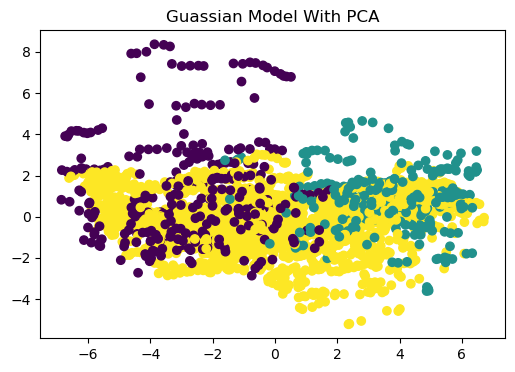

In [104]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=gmm_labels, cmap="viridis")
plt.title("Guassian Model With PCA")
#plt.savefig("Guassian_Model_PCA.png", dpi=300, bbox_inches='tight')
plt.show()

In [105]:
from sklearn.cluster import SpectralClustering

spectral_model = SpectralClustering(
    n_clusters=3,
    affinity='nearest_neighbors',
    n_neighbors=15,   # increase this
    random_state=42
)

spectral_labels = spectral_model.fit_predict(X_scaled)


spectral_score = silhouette_score(X_scaled, spectral_labels)

print("Spectral Clustering Silhouette Score:", spectral_score)


c:\Users\KAPIL\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score: 0.29646266912204094


In [106]:
from sklearn.cluster import KMeans

best_score = -1
best_k = None

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    score = silhouette_score(X_scaled, labels)
    
    print(f"k={k}, silhouette={score:.3f}")
    
    if score > best_score:
        best_score = score
        best_k = k

best_k, best_score

## This finds the best number of clusters
## Based on objective metric

k=2, silhouette=0.298
k=3, silhouette=0.225
k=4, silhouette=0.215
k=5, silhouette=0.190
k=6, silhouette=0.179
k=7, silhouette=0.153


(2, np.float64(0.2983448750499171))

In [107]:
#Train final tuned KMeans

In [108]:
best_kmeans = KMeans(n_clusters=3,random_state=42)
kmeans_labels = best_kmeans.fit_predict(X_scaled)

In [109]:
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
sil_kmeans

np.float64(0.22475254852628268)

In [110]:
## MODEL COMPARISON

In [111]:
result = pd.DataFrame({
    "Model":["KMeans","Hierarchical","DBSCAN","Gaussian Mixture","Spectral"],
    "Silhouette_Score":[sil_kmeans, sil_hc, sil_dbscan if isinstance(sil_dbscan, float) else 0, sil_gmm, spectral_score]})
result

,Model,Silhouette_Score
0,KMeans,0.224753
1,Hierarchical,0.194756
2,DBSCAN,0.320809
3,Gaussian Mixture,0.121203
4,Spectral,0.296463


In [112]:
df_model['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
-1      954
 34     143
 48      75
 38      52
 2       45
       ... 
 154      5
 152      5
 155      5
 156      5
 150      4
Name: count, Length: 158, dtype: int64

In [113]:
## Deployment 

In [114]:
# ============================================================================
# SAVE TRAINED MODEL FOR PRODUCTION DEPLOYMENT
# ============================================================================

# Import the model class
from world_development_model import WorldDevelopmentClusteringModel

# Initialize and train the model
print("=" * 80)
print("SAVING MODEL FOR PRODUCTION DEPLOYMENT")
print("=" * 80)
print()

model = WorldDevelopmentClusteringModel(n_clusters=3, random_state=42)
model.fit(df_clean)

# Save the model to disk
model_path = model.save('world_development_kmeans.pkl')

print()
print("  Model saved successfully and ready for deployment!")
print()
print("NEXT STEPS:")
print("-" * 80)
print("1. Train and save model using: python train_model.py")
print("2. Run Streamlit app: streamlit run streamlit_app.py")
print("3. Or load model in Python:")
print("   from world_development_model import WorldDevelopmentClusteringModel")
print("   model = WorldDevelopmentClusteringModel.load('world_development_kmeans.pkl')")
print("   predictions = model.predict(df)")
print("=" * 80)

SAVING MODEL FOR PRODUCTION DEPLOYMENT

  Model trained successfully!
  Silhouette Score: 0.2248
 Model saved to: world_development_kmeans.pkl

  Model saved successfully and ready for deployment!

NEXT STEPS:
--------------------------------------------------------------------------------
1. Train and save model using: python train_model.py
2. Run Streamlit app: streamlit run streamlit_app.py
3. Or load model in Python:
   from world_development_model import WorldDevelopmentClusteringModel
   model = WorldDevelopmentClusteringModel.load('world_development_kmeans.pkl')
   predictions = model.predict(df)
